In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import pygam as gm
import copy as cp

In [ ]:
def clean_basa_pollen_concentration(mydf_pollen, myspecies):
    mydf_pollen['cal BP'] = - mydf_pollen['cal BP']
    mydf_pollen = mydf_pollen.fillna(0)
    mydf_pollen = mydf_pollen.sort_values(by=['cal BP'])

    all_species = list(mydf_pollen.columns)

    # create a dictionary to map conflicting species names
    species_mapping = {
        "Dec_Querc": "Quercus caducifolio",
        "Ever_Querc": "Quercus perennifolio",
        "Ephedra dist": "Ephedra distachya",
        "Ephedra frag": "Ephedra fragilis",
        "Lygeum": "Lygeum spartum",
        "Cicho": "Cichorioideae",
        "Astroi": "Asteroideae",
        "Carduaceae": "Cardueae",
        "Rubiac": "Rubiaceae",
        "Chenopo": "Chenopodiaceae",
        "Caryphy": "Caryophyllaceae",
        "Brassicac": "Brassicaceae",
        "Saxifrag": "Saxifragaceae",
        "Boraginac": "Boraginaceae",
        "Helianthem": "Helianthemum",
        "Euphorbiac": "Euphorbiaceae",
        "Primulac": "Primulaceae",
        "Scrophulari": "Scrophulariaceae",
        "Campanulac": "Campanulaceae",
        "Valerian": "Valerianaceae",
        "Cerealia": "Cerealia type",
        "Polygon": "Polygonaceae"
    }
    # Sanguisorba and Ribes do not appear. Sanguisorba has 0 pollen, Ribes is not zero but not in the list
    myspecies.remove('Sanguisorba')
    myspecies.remove('Ribes')

    # replace the column names in mydf_pollen_concentration
    mydf_pollen = mydf_pollen.rename(columns=species_mapping)

    metrics_list = ['accrate', 'volume', 'lycadd', 'lyc']

    mydf_pollen = mydf_pollen[['cal BP'] + metrics_list + myspecies] # not taking into account the lycadd / lyc factor
    mydf_pollen = mydf_pollen.set_index('cal BP')

    conversion = mydf_pollen['accrate'] / mydf_pollen['volume']
    # print(mydf_pollen[myspecies])
    for spec in myspecies:
        mydf_pollen[spec] = mydf_pollen[spec] * conversion

    return mydf_pollen

# mydf = clean_basa_pollen_concentration(mydf_pollen_concentration, myspecies)

# for spec in myspecies[:]: # ITERATE OVER A COPY
#         if mydf[spec].sum() == 0:
#             print('Species %s has all zeros!' %(spec))
#             myspecies.remove(spec)
#             mydf = mydf.drop(columns=[spec])


In [44]:
dirdatain = '../data/'

myspecies = 'Abies,Pinus,Juniperus,Taxus,Betula,Corylus,Alnus,Carpinus,Salix,Ulmus,Populus,Acer,Fraxinus,Fagus,Tilia,Juglans,Castanea,Quercus caducifolio,Quercus perennifolio,Pistacia,Rhamnus,Phillyrea,Buxus,Sambucus,Viburnum,Sanguisorba,Tamarix,Thymelaeaceae,Ephedra distachya,Ephedra fragilis,Ericaceae,Hereda helix,Ilex aquifolium,Viscum album,Lonicera,Vitis,Oleaceae,Myrtus,Olea,Poaceae,Lygeum spartum,Artemisia,Cichorioideae,Asteroideae,Cardueae,Rubiaceae,Centaurea,Chenopodiaceae,Caryophyllaceae,Plantago,Brassicaceae,Saxifragaceae,Fabaceae,Genista,Lotus type,Trifolium type,Rosaceae,Ribes,Boraginaceae,Sedum,Helianthemum,Lamiaceae,Urticaceae,Rumex,Berberidaceae,Euphorbiaceae,Primulaceae,Scrophulariaceae,Papaver,Campanulaceae,Convolvulaceae,Liliaceae,Iridaceae,Crassulaceae,Ranunculaceae,Cistaceae,Galium,Apiaceae,Valerianaceae,Cerealia type,Polygonaceae,Ranunculus'.split(',')

# mydf_pollen_concentration = pd.read_csv(dirdatain+'basa_char_par.csv')
mydf_basa_original = pd.read_csv(dirdatain+'basa_original.csv')
mydf = clean_basa_pollen_concentration(mydf_basa_original, myspecies)

for spec in myspecies[:]: # ITERATE OVER A COPY
        if mydf[spec].sum() == 0:
            print('Species %s has all zeros!' %(spec))
            myspecies.remove(spec)
            mydf = mydf.drop(columns=[spec])

Species Lygeum spartum has all zeros!


<Axes: xlabel='cal BP'>

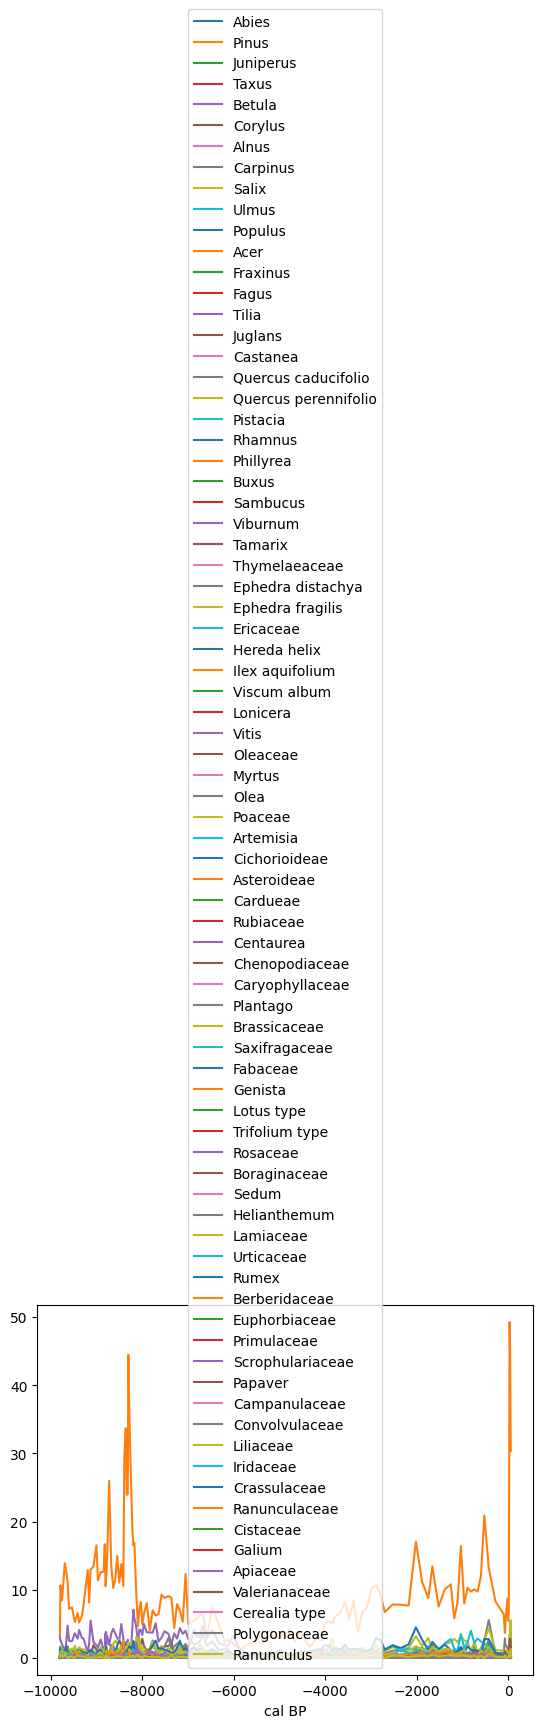

In [48]:
mydf[myspecies].plot()

,depth,density,accrate,weight,volume,lycadd,lyc,Abies,Pinus,Juniperus,...,Botrychium,Osmunda,Pteris,Selaginella,Trilete ornamentada,Trilete indeterminada,Chaetomium,Podospora,Sordaria,Sporormiella
cal BP,,,,,,,,,,,,,,,,,,,,,
-9798.00,1167.5,1.7,0.16,5.7,3.352941,24200,1,0,71,4,...,0,0,0,0,0,0,0,0,0,0
-9785.46,1165.5,1.7,0.16,3.3,1.941176,24200,191,0,129,15,...,0,0,0,0,0,0,0,0,0,0
-9754.12,1160.5,1.7,0.16,4.2,2.470588,24200,150,0,130,14,...,0,0,0,0,0,1,0,0,0,0
-9722.78,1155.5,1.7,0.16,4.0,2.352941,24200,139,0,161,10,...,0,0,0,0,0,1,0,0,0,0
-9691.44,1150.5,1.7,0.16,3.8,2.235294,24200,300,0,194,20,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13.25,20.5,1.7,0.09,3.2,1.882353,24200,17,0,141,9,...,0,0,0,0,0,0,0,0,0,0
30.47,15.5,1.7,0.46,4.0,2.352941,24200,29,0,252,6,...,0,0,0,1,0,0,0,0,0,0
42.11,10.5,1.5,0.46,3.2,2.133333,24200,58,0,206,8,...,0,0,0,0,0,0,0,1,0,0
